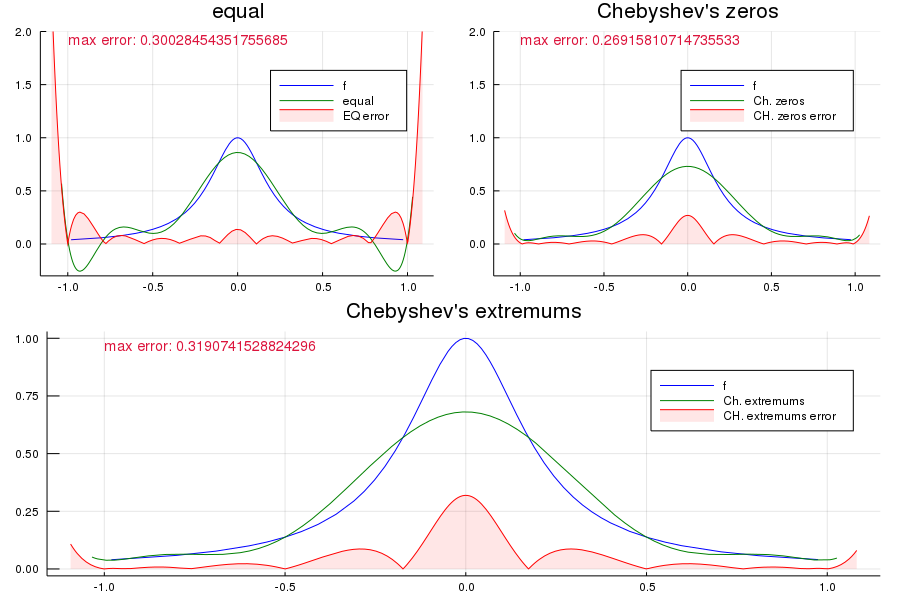

In [43]:
using Plots
runge = x->1/(1+x^2)
f = x->1/(1+25x^2)
#P2D to macierz Nx2 o wierszach [x y]
# współczynniki ilorazów dla interp. Newtona
function _diff(P2D) 
    b, n = Array(P2D[:, 2]), length(P2D[:, 1])
    for  i = 2:n
        for j = n:-1:i 
            b[j] = (b[j] - b[j-1])/(P2D[j, 1] - P2D[j-i+1, 1])
        end
    end
    return b 
end

# Zwraca wartość ilorazu.
function diff(P2D)
    last(_diff(P2D))
end

function interp_newton(P2D)
    return function(x)
        b, n = _diff(P2D), length(P2D[:, 1])-1
        sum, p = b[1], 1
        for i in 1:n
            p *= (x - P2D[i, 1])
            sum += b[i+1]*p
            end # nie chce mi się robić Hornera
        sum
    end
end;

err = f_interp->x->abs(f(x)-f_interp(x))
maxerr = f_interp->reduce(max, map(x->err(f_interp)(x), range(-1,stop=1,length=1000)))
w9_eq = interp_newton(reduce(vcat, map(x->[x f(x)], collect(range(-1,stop=1, length=10)))))             # w równoodległych
w9_T10_zeros = interp_newton(reduce(vcat, map(x->[x f(x)], map(j->cos(pi*((2*j-1)/(2*10))), [1:10;])))) # w zerach Czebyszewa
w9_T9_extremums = interp_newton(reduce(vcat, map(x->[x f(x)], map(j->cos(j*pi/9), [0:9;])))) # w extremach Czebyszewa

equal_plot = begin
    plot(f, -1, 1, line=(color=:blue), label="f", title="equal")
    plot!(w9_eq, line=(color=:green), label="equal")
    plot!(err(w9_eq), line=(color=:red),fill=(0, 0.1, :red), label="EQ error")
    annotate!(-1, 2, text(string("max error: ", maxerr(w9_eq)), 10, :left, :top, :crimson))
end
Chebyshev_zeros_plot = begin
    plot(f, -1, 1, line=(color=:blue), label="f", title="Chebyshev's zeros")
    plot!(w9_T10_zeros, line=(color=:green), label="Ch. zeros")
    plot!(err(w9_T10_zeros), line=(color=:red),fill=(0, 0.1, :red), label="CH. zeros error")
    annotate!(-1, 2, text(string("max error: ", maxerr(w9_T10_zeros)), 10, :left, :top, :crimson))
end
row1_plot = plot(equal_plot, Chebyshev_zeros_plot, layout=(1,2), ylims=(-0.3, 2))

Chebyshev_extremums_plot = begin
    plot(f, -1, 1, line=(color=:blue), label="f", title="Chebyshev's extremums")
    plot!(w9_T9_extremums, line=(color=:green), label="Ch. extremums")
    plot!(err(w9_T9_extremums), line=(color=:red), fill=(0, 0.1, :red), label="CH. extremums error")
    annotate!(-1, 1, text(string("max error: ", maxerr(w9_T9_extremums)), 10, :left, :top, :crimson))
end
plot(row1_plot, Chebyshev_extremums_plot, layout=(2,1), size=(900, 600), fmt=:png)

0.274680 0.196116
-0.000000 -0.000000
-0.519810 -0.263611
-0.000000 0.000000
0.428231 0.177167
-0.000000 0.000000
-0.337784 -0.119070
-0.000000 -0.000000
0.254600 0.080025
-0.000000 -0.000000


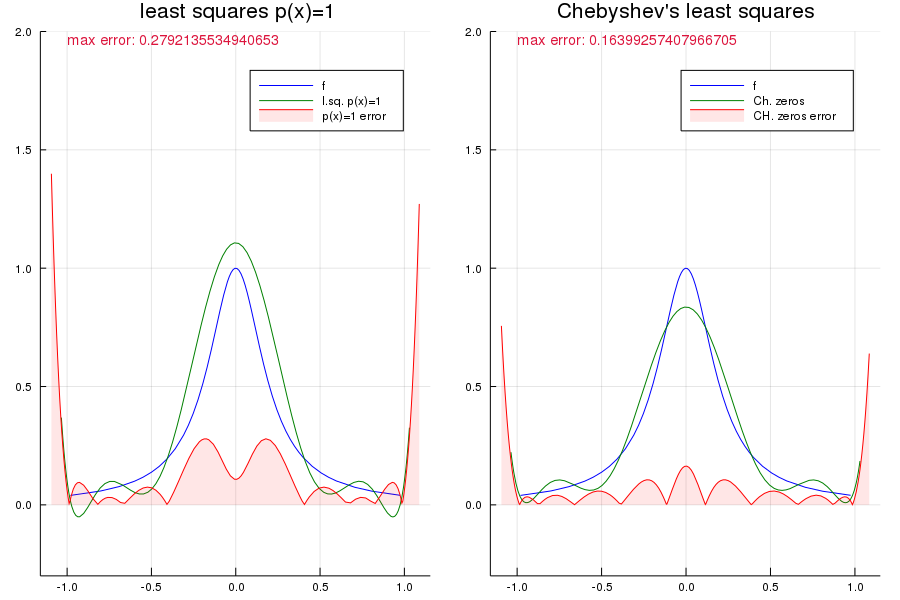

In [45]:
using QuadGK
using Printf

P = Array{Function}(undef,10)

P[1] = x -> 1
P[2] = x -> x

for i in 3:1:10
    P[i] = x -> ((2i-1)/i)x*P[i-1](x) - ((i-1)/i)*P[i-2](x)
end

T = Array{Function}(undef,10)

T[1] = x -> 1
T[2] = x -> x

for i in 3:1:10
    T[i] = x -> 2x*T[i-1](x) - T[i-2](x)
end
    
function prods(f::Function,g::Function,p::Function)
    return quadgk(x -> f(x)*g(x)*p(x),-0.9999999999999929,0.9999999999999929)[1]
end

prod= Array{Float64,2}(undef,10,2)

for i in 1:10
    prod[i,1] = (prods(f,P[i],x->1))/prods(P[i],P[i],x->1)
    prod[i,2] = (prods(f,T[i],x -> 1/sqrt(1-x^2)))/prods(T[i],T[i],x -> 1/sqrt(1-x^2))
    @printf("%f %f\n",prod[i,1],prod[i,2])
end

function least_squares(f,t,nr)
    return function(x)
        wn = 0;
        for i in 1:1:10
            wn += prod[i,nr]*t[i](x)
        end
        return wn
    end
end
    
w9_square_p1 = least_squares(f,P,1)
w9_square_Chebyshev = least_squares(f,T,2)
     
square_p1_plot = begin
    plot(f, -1, 1, line=(color=:blue), label="f", title="least squares p(x)=1")
    plot!(w9_square_p1, line=(color=:green), label="l.sq. p(x)=1")
    plot!(err(w9_square_p1), line=(color=:red),fill=(0, 0.1, :red), label="p(x)=1 error")
    annotate!(-1, 2, text(string("max error: ", maxerr(w9_square_p1)), 10, :left, :top, :crimson))
end
square_Chebyshev_plot = begin
    plot(f, -1, 1, line=(color=:blue), label="f", title="Chebyshev's least squares")
    plot!(w9_square_Chebyshev, line=(color=:green), label="Ch. zeros")
    plot!(err(w9_square_Chebyshev), line=(color=:red),fill=(0, 0.1, :red), label="CH. zeros error")
    annotate!(-1, 2, text(string("max error: ", maxerr(w9_square_Chebyshev)), 10, :left, :top, :crimson))
end
row2_plot = plot(square_p1_plot, square_Chebyshev_plot, layout=(1,2), size=(900, 600), fmt=:png, ylims=(-0.3, 2))

# Dlaczego całka od (-1,1) a nie [-1,1] :
Bo julia zasysa w całkach (jak niżej stwierdza że Inf, a wolfram, że 0).


In [32]:
quadgk(x->x/((1+25x^2)*(sqrt(1-x^2))),-1,1)

DomainError: DomainError with 0.9999999999999964:
integrand produced Inf in the interval (0.9999999999999929, 1.0)